In [ ]:
#https://git.ligo.org/lscsoft/bilby/blob/master/examples/tutorials/fitting_with_x_and_y_errors.ipynb

# Fitting a model to data with both x and y errors with BILBY


In [1]:
import bilby
import inspect
%pylab inline

21:20 bilby WARNING : You do not have gwpy installed currently. You will  not be able to use some of the prebuilt functions.
21:20 bilby WARNING : You do not have gwpy installed currently. You will  not be able to use some of the prebuilt functions.
21:20 bilby WARNING : You do not have gwpy installed currently. You will  not be able to use some of the prebuilt functions.


Populating the interactive namespace from numpy and matplotlib


## First we create the data and plot it
 

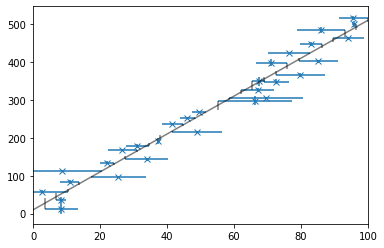

In [2]:
#define our model, a line
def model(x, m, c, **kwargs):
    y = m*x + c
    return y

#make a function to create and plot our data
def make_data(points, m , c, xerr, yerr, seed):
    np.random.seed(int(seed))
    xtrue = np.linspace(0,100,points)
    ytrue = model(x = xtrue, m = m, c = c)

    xerr = xerr * np.random.randn(points)
    yerr = yerr * np.random.randn(points)
    xobs = xtrue + xerr
    yobs = ytrue + yerr
    
    plt.errorbar(xobs, yobs, xerr = xerr, yerr = yerr, fmt = 'x')
    plt.errorbar(xtrue, ytrue, yerr = yerr, color = 'black', alpha = 0.5)
    plt.xlim(0,100)
    plt.show()
    
    data = {'xtrue': xtrue, 'ytrue':ytrue, 'xobs':xobs, 'yobs':yobs, 'xerr':xerr, 'yerr':yerr}
    
    return data

data = make_data(points = 30, m = 5, c = 10, xerr = 5, yerr = 5, seed = 123)

## Now lets set up the prior and bilby output directory


In [4]:
 #setting up bilby priors
priors = dict(m=bilby.core.prior.Uniform(0, 30, 'm'),
              c=bilby.core.prior.Uniform(0, 30, 'c'))

outdir = 'outdir-notebook'
livepoints = 100
walks = 100

### Our first step is to recover the straight line using a simple Gaussian Likelihood that only takes into account the y errors. Under the assumption we know x exactly. In this case, we pass in xtrue for x


In [5]:
OneDGaussian_knownx = bilby.core.likelihood.GaussianLikelihood(x = data['xtrue'], y = data['yobs'], func = model, sigma = data['yerr'])
result_1D_xtrue = bilby.run_sampler(
    likelihood=OneDGaussian_knownx, priors=priors, sampler='dynesty', npoints=livepoints,
    walks=walks, outdir=outdir, label='xtrue_1D_Gaussian')

21:21 bilby INFO    : Running for label 'xtrue_1D_Gaussian', output will be saved to 'outdir-notebook'
21:21 bilby INFO    : Search parameters:
21:21 bilby INFO    :   m = Uniform(minimum=0, maximum=30, name='m', latex_label='m', unit=None, boundary=None)
21:21 bilby INFO    :   c = Uniform(minimum=0, maximum=30, name='c', latex_label='c', unit=None, boundary=None)
21:21 bilby INFO    : Single likelihood evaluation took 7.772e-05 s


0it [00:00, ?it/s]

21:21 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 100, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': None, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': None, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 2.0, 'facc': 0.5, 'slices': 5, 'update_interval': 60, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x1c1c382d50>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None}
21:21 bilby INFO    : Checkpoint every n_check_point = 8000000
21:21 bilby INFO    : Using dynesty version 1.0.0


1897it [00:35, 32.36it/s, bound:1522 ncall:156011 eff:1.2% logz=-89.75+/-0.55 dlogz:0.104>0.10]     

21:22 bilby INFO    : Writing checkpoint file outdir-notebook/xtrue_1D_Gaussian_resume.pickle



1900it [00:35, 53.23it/s, bound:1525 ncall:156311 eff:1.3% logz=-89.65+/-0.56 dlogz:0.001>0.10]

21:22 bilby INFO    : Sampling time: 0:00:35.270342
21:22 bilby INFO    : Summary of results:
nsamples: 2000
log_noise_evidence:    nan
log_evidence: -89.655 +/-  0.556
log_bayes_factor:    nan +/-  0.556



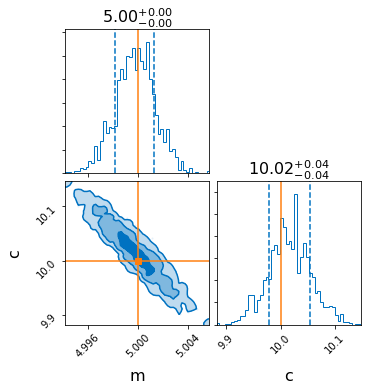

In [13]:
result_1D_xtrue.plot_corner(truth=dict(m=5, c = 10), titles = True, save=False);

In [6]:
# result_1D_xtrue.plot_corner(truth=dict(m=5, c = 10), titles = True)
result_1D_xtrue.plot_with_data(model = model, x = data['xtrue'], y = data['yobs'], ndraws=1000, npoints=100)
plt.show()

21:22 bilby INFO    : Plotting 1000 draws
21:22 bilby INFO    : Plotting maximum likelihood
